# Entendendo nosso primeiro problema

In [77]:
import pandas as pd

In [78]:
passageiros = pd.read_csv('dados/passageiros.csv')
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [79]:
import seaborn as sns

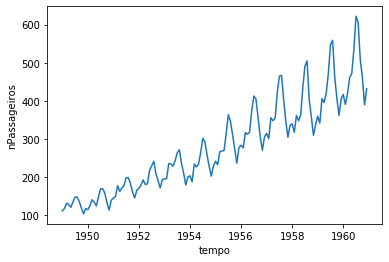

In [80]:
sns.lineplot(x='tempo', y='nPassageiros', data=passageiros)

# Regressão Linear

In [81]:
Tempo = passageiros.iloc[:, :-1].values
nPassageiros = passageiros.iloc[:,1].values

In [82]:
# nPassageiros

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, test_size = 0.3)

In [85]:
from sklearn import linear_model

In [86]:
regressor = linear_model.LinearRegression()
regressor.fit(Tempo_treino, nPassageiros_treino)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
nPassageiros_predito = regressor.predict(Tempo_teste)

In [88]:
import numpy as np

In [89]:
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                   'nPassageiros': nPassageiros_predito})

In [90]:
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                  'nPassageiros': nPassageiros_teste})

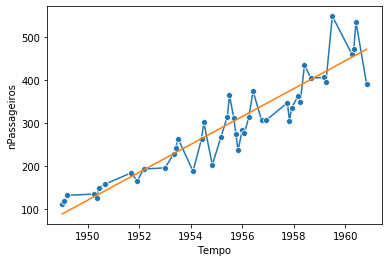

In [91]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)

## Medindo a qualidade da Regressão

In [92]:
regressor.coef_

array([32.33075914])

In [93]:
regressor.intercept_

-62923.8071340453

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8618348935718644

## Máquinas de Vetores de Suporte (Teoria)

In [96]:
# Até agora, ajustamos uma reta aos nossos pontos, porém ela não se aproxima bem, não nos ajuda a prever os altos e baixos,
# a sazonalidade dos nossos gráficos. Podemos tentar trabalhar com outra técnica mais sofisticada, as máquinas de vetores de 
# suporte. Ou SVM.

# Elas trabalham com uma reta de hiperplano, mas também temos duas retas de borda, com uma área definida entre elas.
# Dentro, os pontos são chamados de vetores de suporte. Elas estão a uma distância mais ou menos E da reta de hiperplano.
# Assim, nossa reta é definida por essa equação. Somando ou subtraindo o valor E conseguimos definir a reta de borda.

# Isso é usado para resolver planos lineares. Porém, os pontos de vetores de suporte nos ajudam a passar para outro domínio,
# porque estamos trabalhando com um problema não linear, e queremos remapear os dados para um domínio em que enxergamos
# o problema de forma linear.

# A função que vamos usar pega um dado em um domínio com poucas dimensões e passa para um domínio com mais dimensões, 
# em que consigamos trabalhar de forma linear. Podemos começar a trabalhar com as SVMs.

## Máquinas de Vetores de Suporte (Aplicação)

In [97]:
from sklearn.svm import SVR

In [98]:
regressor_svr = SVR(C=100000)
regressor_svr.fit(Tempo_treino, nPassageiros_treino)

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [99]:
nPassageiros_predito_svr = regressor_svr.predict(Tempo_teste)

In [100]:
passageiros_predito_svr = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste), 'nPassageiros': nPassageiros_predito_svr})

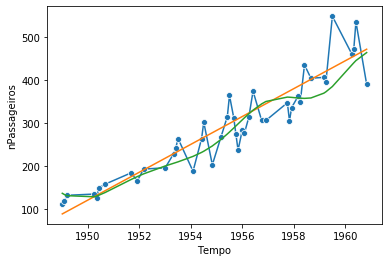

In [101]:
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_teste, marker='o')
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito)
sns.lineplot(x='Tempo', y='nPassageiros', data=passageiros_predito_svr)

In [102]:
r2_score(nPassageiros_teste, nPassageiros_predito_svr)

0.828213032652106

In [103]:
r2_score(nPassageiros_teste, nPassageiros_predito)

0.8618348935718644

# Entendendo o Problema de Classificação

In [106]:
celular = pd.read_csv('dados/celular.csv', delimiter=',')

In [107]:
celular.head()

,salario,economias,idade,dividas,plano
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


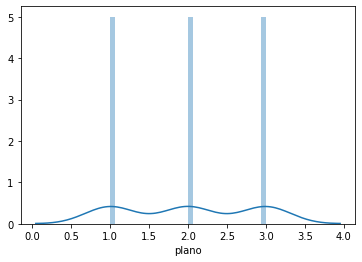

In [109]:
sns.distplot(celular['plano'], bins=30)

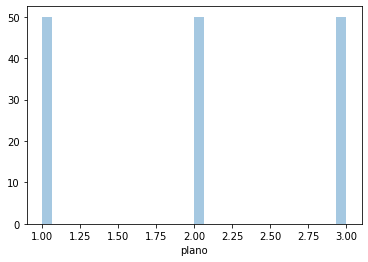

In [110]:
sns.distplot(celular['plano'], bins=30, kde=False)

## Árvores de Decisão

In [111]:
X = celular.iloc[:, :-1].values
y = celular.iloc[:, 4].values

In [113]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.3)

In [114]:
from sklearn import tree

In [116]:
classificador_arvore = tree.DecisionTreeClassifier()

In [118]:
classificador_arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [119]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'